In [20]:
import pandas as pd
from pybrainlife.data.collect import collect_data
import pybrainlife.data.manipulate as pybldm
import pybrainlife.vis.plots as pyblvp
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#!pip install --upgrade pybrainlife

In [22]:
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('neuro/tractmeasures',['macro'],['default', 'cleaned', '10_20_2023'],'tractmeasures.csv','tractmeasures_default.csv')
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
0,wbfg,311,6275,70.588872,4.768819,53.633282,3.403996,0.029073,0.032540,21953.139055,...,NaN,NaN,1.000000,1.000000,1.000000,100610,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T17:33:05.970Z
1,ROI_thalamus-8115_ROI_lh.onset,151,2651,68.555081,4.044922,53.674715,2.019186,NaN,NaN,10351.817202,...,3.675968,4.792567,0.422470,0.485531,0.471542,100610,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T17:33:05.970Z
2,ROI_thalamus-8215_ROI_rh.onset,156,3439,72.840628,3.313518,54.208736,1.850905,NaN,NaN,11363.137966,...,4.043523,4.705151,0.548048,0.501608,0.517609,100610,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T17:33:05.970Z
3,ROI_thalamus-8215_ROI_rh.pmhg,4,255,59.545972,18.170887,29.626476,5.544667,NaN,NaN,238.183887,...,11.390481,1.950757,0.040637,0.012862,0.010850,100610,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T17:33:05.970Z
0,wbfg,731,8122,54.008330,19.194298,38.969541,11.554203,0.012608,0.013935,39480.089027,...,NaN,NaN,1.000000,1.000000,1.000000,161832,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T18:36:22.468Z


In [23]:
# only use subjects with sufficient streamlines 
subjectsIncluded = ['100206', '100408', '101107', '125525', '161832', '169747', '199352', '206828', '211215', '585862', '803240', '816653']
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['subjectID'].isin(subjectsIncluded)]

In [24]:
#tractmeasures_df['tags'] = [ f[1] for f in tractmeasures_df.tags ]
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['structureID'] != 'wbfg']
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
1,ROI_thalamus-8115_ROI_lh.onset,201,3347,67.278041,4.431915,48.549054,2.332576,NaN,NaN,13522.886215,...,3.413991,3.259076,0.412091,0.274966,0.342524,161832,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T18:36:22.468Z
2,ROI_thalamus-8115_ROI_lh.pmhg,200,802,28.440806,1.894715,23.897911,0.954309,NaN,NaN,5688.161125,...,1.802972,0.991862,0.098744,0.273598,0.144077,161832,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T18:36:22.468Z
3,ROI_thalamus-8215_ROI_rh.onset,207,3698,71.555533,5.049701,49.252348,1.341239,NaN,NaN,14811.995378,...,4.773600,4.451933,0.455307,0.283174,0.375176,161832,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T18:36:22.468Z
4,ROI_thalamus-8215_ROI_rh.pmhg,123,1405,44.366230,12.061121,30.516719,3.217497,NaN,NaN,5457.046309,...,5.706525,4.858180,0.172987,0.168263,0.138223,161832,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T18:36:22.468Z
1,ROI_thalamus-8115_ROI_lh.onset,246,3969,66.465202,6.166018,51.371564,4.394542,NaN,NaN,16350.439663,...,5.710470,2.445838,0.421069,0.333786,0.412639,169747,1,[10_20_2023],"[roi_trekker, macro]",2023-10-23T19:08:08.515Z


In [25]:
tractmeasures_df.groupby(['structureID']).mean(numeric_only=True)

,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,endpoint1Density,...,AverageEndpointDistanceFromCentroid1,AverageEndpointDistanceFromCentroid2,stdevOfEndpointDistanceFromCentroid1,stdevEndpointDistanceFromCentroid2,MidpointDensity,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion
structureID,,,,,,,,,,,,,,,,,,,,,
ROI_thalamus-8115_ROI_lh.onset,215.882353,3553.588235,63.732427,5.364288,50.335908,2.179522,NaN,NaN,13766.262069,7.324758,...,1.474803,9.142050,0.679424,4.408228,1.805146,5.274456,2.735932,0.367057,0.258120,0.309577
ROI_thalamus-8115_ROI_lh.pmhg,179.529412,1008.647059,32.406293,3.916956,25.909239,2.471924,NaN,NaN,5782.183103,8.778063,...,1.421332,4.465711,0.755361,2.104245,2.085802,2.559659,1.314718,0.103642,0.212641,0.129662
ROI_thalamus-8215_ROI_rh.onset,253.941176,4271.823529,67.813518,4.887529,51.558858,2.137975,NaN,NaN,17104.095793,2.182994,...,8.779321,1.658270,4.857249,0.745295,1.755810,6.166282,3.297141,0.439448,0.294247,0.369839
ROI_thalamus-8215_ROI_rh.pmhg,147.000000,972.823529,38.169625,6.325937,28.986702,2.191481,NaN,NaN,5354.179176,4.283372,...,3.030046,1.655649,1.877884,0.620659,2.056244,3.628336,2.344558,0.101553,0.166565,0.116235


In [26]:
macro_stats = tractmeasures_df.loc[:,['structureID', 'StreamlineCount', 'volume', 'avgerageStreamlineLength', 'streamlineLengthStdev']].groupby(['structureID']).mean(numeric_only=True)
macro_stats = macro_stats.reset_index()
macro_stats

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev
0,ROI_thalamus-8115_ROI_lh.onset,215.882353,3553.588235,63.732427,5.364288
1,ROI_thalamus-8115_ROI_lh.pmhg,179.529412,1008.647059,32.406293,3.916956
2,ROI_thalamus-8215_ROI_rh.onset,253.941176,4271.823529,67.813518,4.887529
3,ROI_thalamus-8215_ROI_rh.pmhg,147.000000,972.823529,38.169625,6.325937


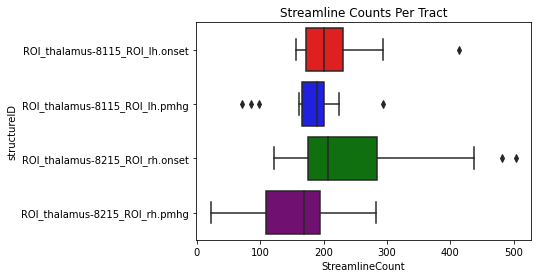

In [27]:
labels = ['lh.onset', 'lh.pmhg', 'rh.onset', 'rh.pmhg']
colors = ['red', 'blue', 'green', 'purple']
sns.boxplot(data=tractmeasures_df, x="StreamlineCount", y='structureID', orient='h', palette=colors)
plt.title('Streamline Counts Per Tract')
#plt.xticks(range(len(labels)), labels)
plt.show()

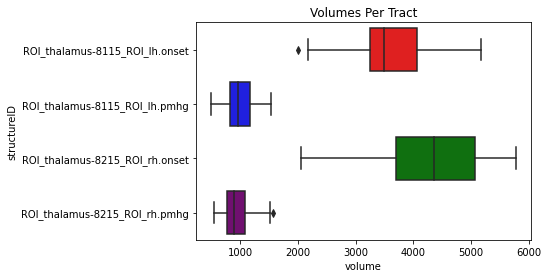

In [28]:
sns.boxplot(data=tractmeasures_df, x="volume", y = 'structureID', orient='h', palette=colors)
plt.title('Volumes Per Tract');
#plt.xticks(range(len(labels)), labels)
plt.show()

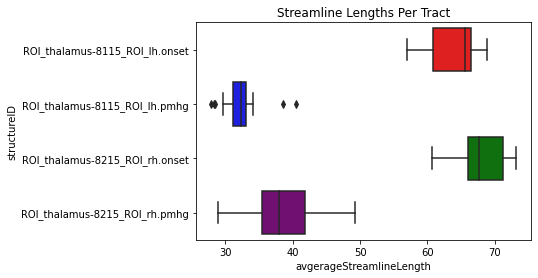

In [29]:
sns.boxplot(data=tractmeasures_df, x = "avgerageStreamlineLength", y = 'structureID', orient='h', palette=colors)
plt.title('Streamline Lengths Per Tract')
#plt.xticks(range(len(labels)), labels)
plt.show()

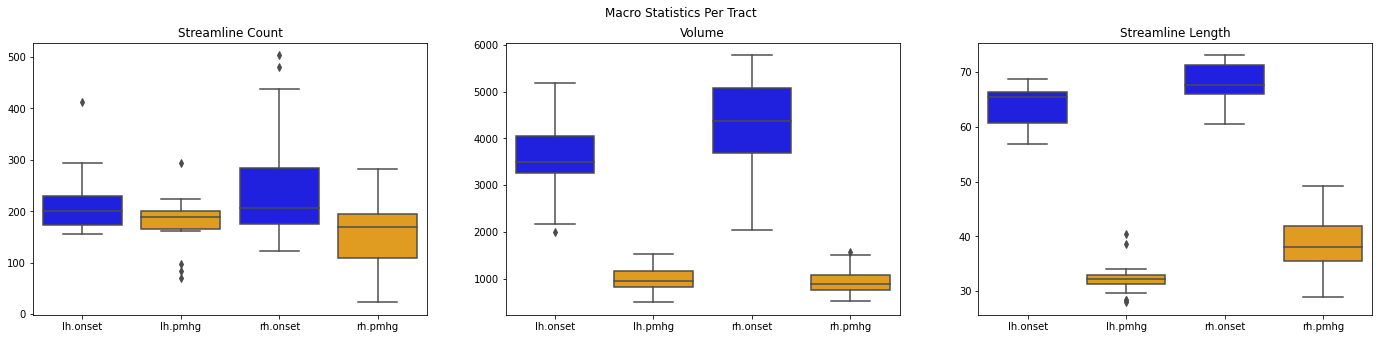

In [34]:
labels = ['lh.onset', 'lh.pmhg', 'rh.onset', 'rh.pmhg']
colors = ['blue', 'orange', 'blue', 'orange']
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

sns.boxplot(data=tractmeasures_df, y="StreamlineCount", x='structureID', orient='v', palette=colors, ax=axes[0])
axes[0].set_title('Streamline Count')
axes[0].set_xticks(range(len(labels)))
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('')
axes[0].set_xlabel('')

sns.boxplot(data=tractmeasures_df, y="volume", x='structureID', orient='v', palette=colors, ax=axes[1])
axes[1].set_title('Volume')
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('')
axes[1].set_xlabel('')

sns.boxplot(data=tractmeasures_df, y="avgerageStreamlineLength", x='structureID', orient='v', palette=colors, ax=axes[2])
axes[2].set_title('Streamline Length')
axes[2].set_xticks(range(len(labels)))
axes[2].set_xticklabels(labels)
axes[2].set_ylabel('')
axes[2].set_xlabel('')

plt.suptitle('Macro Statistics Per Tract');